In [1]:
# Import the Libararies
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np

In [2]:
# Import the dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [3]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
# Scaling
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

In [6]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [7]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.4150 - val_loss: 0.3439
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.3273 - val_loss: 0.3191
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.3113 - val_loss: 0.3079
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.3014 - val_loss: 0.2999
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2952 - val_loss: 0.2949
Epoch 6/50
235/235 [==============================] - 2s 6ms/step - loss: 0.2913 - val_loss: 0.2920
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2890 - val_loss: 0.2902
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2875 - val_loss: 0.2891
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2865 - val_loss: 0.2883
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2858 - val_loss: 0.2876

In [9]:
from matplotlib import pyplot as plt

Original Image


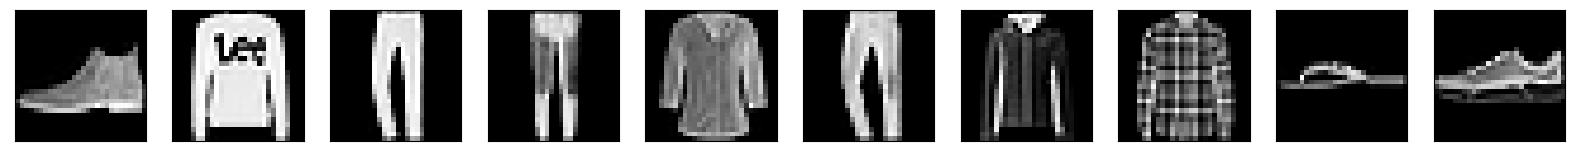

Reconstructed Image


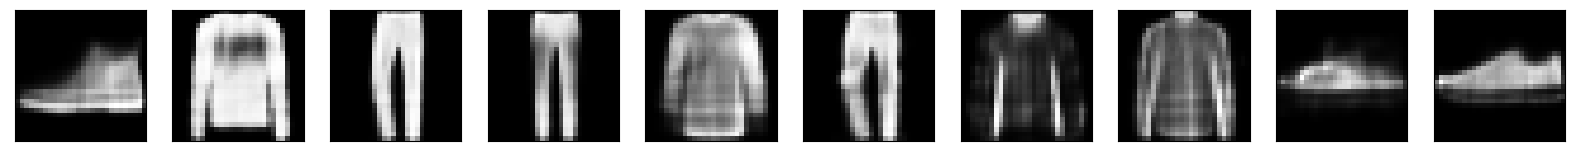

In [10]:
decoded_imgs = autoencoder.predict(x_test)

n = 10 
print('Original Image')
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


print('Reconstructed Image')
plt.figure(figsize=(20, 4))
for i in range(n):
# reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()